# Zuntz's files

In [1]:
import numpy as np
from astropy.table import Table
import pickle
import matplotlib.pyplot as plt

In [67]:
with open("files/vae_project_data_v1.pkl", 'rb') as f:
    data = pickle.load(f)

In [197]:
data.keys()

dict_keys(['nz_mean_0', 'nz_cov_0', 'nz_mean_1', 'nz_cov_1', 'nz_mean_2', 'nz_cov_2', 'nz_mean_3', 'nz_cov_3', 'nz_z', 'data_vector', 'data_covariance', 'scale_cut_ell_min', 'scale_cut_ell_max', 'fixed_cosmo_params', 'varied_cosmo_params', 'window_ell', 'window_weight'])

In [224]:
np.diag(data["data_covariance"])

array([1.08653759e-19, 1.67684689e-20, 8.65366907e-21, 5.78297366e-21,
       4.32586029e-21, 3.44873703e-21, 2.86470433e-21, 2.44878467e-21,
       2.13795835e-21, 1.89707801e-21, 1.70502830e-21, 1.54838246e-21,
       1.41820398e-21, 1.30831928e-21, 1.21433030e-21, 1.13302224e-21,
       1.06198881e-21, 9.99396426e-22, 9.43822566e-22, 8.94146865e-22,
       1.39030566e-19, 1.21307869e-20, 5.35584545e-21, 3.35632274e-21,
       2.42526759e-21, 1.89179063e-21, 1.54775090e-21, 1.30822247e-21,
       1.13224278e-21, 9.97685279e-22, 8.91575092e-22, 8.05816061e-22,
       7.35101843e-22, 6.75813586e-22, 6.25401126e-22, 5.82017425e-22,
       5.44291984e-22, 5.11187775e-22, 4.81905683e-22, 4.55820161e-22,
       2.17149724e-19, 1.68566835e-20, 6.66724379e-21, 3.93928736e-21,
       2.75065141e-21, 2.09869257e-21, 1.69063911e-21, 1.41260837e-21,
       1.21164653e-21, 1.05994698e-21, 9.41561687e-22, 8.46712705e-22,
       7.69083580e-22, 7.04416858e-22, 6.49742847e-22, 6.02929177e-22,
      

In [226]:
def get_ij(field, i,j):
    sel_i = data["data_vector"]["bin1"] == i
    sel_j = data["data_vector"]["bin2"] == j
    sel_j = sel_j[sel_i]
    field_ij = field[sel_i][sel_j]
    return field_ij[11:18]

In [228]:
data_00 = get_ij(data["data_vector"]["value"],0,0)
data_01 = get_ij(data["data_vector"]["value"],0,1)
data_02 = get_ij(data["data_vector"]["value"],0,2)
data_03 = get_ij(data["data_vector"]["value"],0,3)
data_11 = get_ij(data["data_vector"]["value"],1,1)
data_12 = get_ij(data["data_vector"]["value"],1,2)
data_13 = get_ij(data["data_vector"]["value"],1,3)
data_22 = get_ij(data["data_vector"]["value"],2,2)
data_23 = get_ij(data["data_vector"]["value"],2,3)
data_33 = get_ij(data["data_vector"]["value"],3,3)

cut_data = np.array([data_00, data_01, data_02, data_03,
          data_11, data_12, data_13,
          data_22, data_23,
          data_33]).flatten()

cut_data

array([3.16769591e-10, 2.36206970e-10, 1.74755600e-10, 1.27245505e-10,
       9.06740742e-11, 6.29770225e-11, 4.25085938e-11, 4.51282639e-10,
       3.36268754e-10, 2.49897315e-10, 1.83626506e-10, 1.32542717e-10,
       9.34910716e-11, 6.41865126e-11, 5.17120351e-10, 3.85048412e-10,
       2.86433384e-10, 2.11019351e-10, 1.52906093e-10, 1.08373324e-10,
       7.48036577e-11, 5.50517418e-10, 4.09789865e-10, 3.04962476e-10,
       2.24909927e-10, 1.63230902e-10, 1.15918732e-10, 8.01864455e-11,
       7.91064974e-10, 5.83432489e-10, 4.32819488e-10, 3.20315001e-10,
       2.34730000e-10, 1.69185708e-10, 1.19250944e-10, 1.01366977e-09,
       7.42796918e-10, 5.49072848e-10, 4.06325942e-10, 2.98789905e-10,
       2.16765597e-10, 1.54159324e-10, 1.13033990e-09, 8.26171204e-10,
       6.09760394e-10, 4.51139379e-10, 3.32120311e-10, 2.41505230e-10,
       1.72312527e-10, 1.46303644e-09, 1.05814504e-09, 7.74340742e-10,
       5.70121861e-10, 4.19516609e-10, 3.06252103e-10, 2.20220665e-10,
      

In [230]:
err = np.sqrt(np.diag(data["data_covariance"]))
err_00 = get_ij(err,0,0)
err_01 = get_ij(err,0,1)
err_02 = get_ij(err,0,2)
err_03 = get_ij(err,0,3)
err_11 = get_ij(err,1,1)
err_12 = get_ij(err,1,2)
err_13 = get_ij(err,1,3)
err_22 = get_ij(err,2,2)
err_23 = get_ij(err,2,3)
err_33 = get_ij(err,3,3)

cut_err = np.array([err_00, err_01, err_02, err_03,
          err_11, err_12, err_13,
          err_22, err_23,
          err_33]).flatten()

cut_err

array([3.93494912e-11, 3.76590492e-11, 3.61706964e-11, 3.48472424e-11,
       3.36603957e-11, 3.25881698e-11, 3.16132318e-11, 2.83868995e-11,
       2.71127616e-11, 2.59964149e-11, 2.50080212e-11, 2.41250373e-11,
       2.33300661e-11, 2.26094621e-11, 2.90983282e-11, 2.77323562e-11,
       2.65408526e-11, 2.54900539e-11, 2.45546162e-11, 2.37150928e-11,
       2.29563043e-11, 2.97753372e-11, 2.83238029e-11, 2.70624574e-11,
       2.59537447e-11, 2.49696422e-11, 2.40887606e-11, 2.32944795e-11,
       4.09126358e-11, 3.90066897e-11, 3.73427534e-11, 3.58743458e-11,
       3.45664587e-11, 3.33921777e-11, 3.23304459e-11, 2.97336973e-11,
       2.82733543e-11, 2.70062802e-11, 2.58940456e-11, 2.49080042e-11,
       2.40263331e-11, 2.32320916e-11, 3.04399059e-11, 2.88879016e-11,
       2.75464052e-11, 2.63727536e-11, 2.53353297e-11, 2.44101620e-11,
       2.35787285e-11, 4.29756749e-11, 4.07995332e-11, 3.89151684e-11,
       3.72642372e-11, 3.58033052e-11, 3.44993159e-11, 3.33266303e-11,
      

In [151]:
sell_00 = sel==0
sell_01 = sel==4
sell_02 = sel==8
sell_03 = sel==12
sell_11 = sel==1
sell_11 = sel==5
sell_12 = sel==9
sell_22 = sel==6
sell_23 = sel==12
sell_33 = sel==13



In [98]:
ell = data["window_ell"]
ell = ell[data["scale_cut_ell_min"]<ell]
ell = ell[ell<data["scale_cut_ell_max"]]

In [58]:
sel_0 = data["nz_cov_0"][1]!=0.0
sel_1 = data["nz_cov_1"][1]!=0.0
sel_2 = data["nz_cov_2"][1]!=0.0
sel_3 = data["nz_cov_3"][1]!=0.0

In [59]:
sel_0[1] = False

sel_1[:np.argmax(data["nz_mean_1"])-45] = False
sel_1[np.argmax(data["nz_mean_1"])+45:] = False

sel_2[:np.argmax(data["nz_mean_2"])-45] = False
sel_2[np.argmax(data["nz_mean_2"])+45:] = False

sel_3[:np.argmax(data["nz_mean_3"])-45] = False
sel_3[np.argmax(data["nz_mean_3"])+45:] = False


In [60]:
data["sel_0"] = sel_0
data["sel_1"] = sel_1
data["sel_2"] = sel_2
data["sel_3"] = sel_3

90
90
90
90


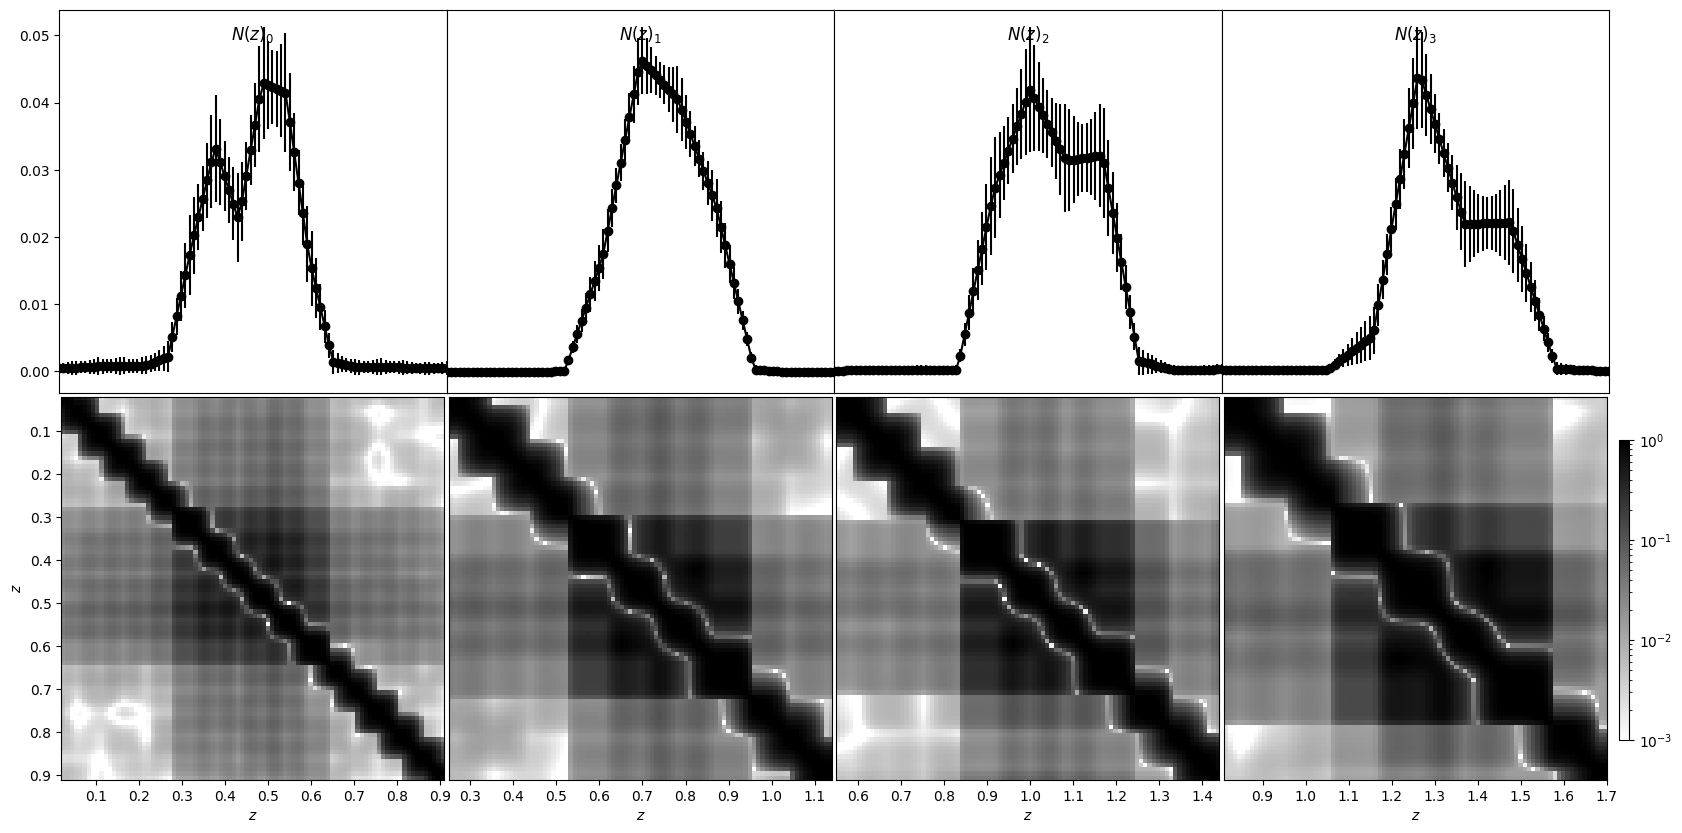

In [61]:
from matplotlib.colors import LogNorm
colorss = ["k", "k", "k", "k"]
figure, axis = plt.subplots(2, 4, figsize=(20,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(0, 4):
    sel = data["sel_{}".format(i)]
    zs, nz = data["nz_z"][sel], data["nz_mean_{}".format(i)][sel]
    print(len(zs))
    norm = np.sum(nz)
    nz = nz / norm
    cov = np.array([row[sel] for row in data["nz_cov_{}".format(i)][sel]]) / norm / norm
    err = np.sqrt(np.diag(cov))
    axis[0 , i].errorbar(zs, nz, yerr=np.sqrt(np.diag(cov)), fmt='{}o-'.format(colorss[i]), label="$HSC_{}$".format(i))
    #axis[0, i].set_ylim(0, 0.05)
    axis[0, i].set_xlim(zs[0], zs[-1])
    axis[0, i].set_title(r"$N(z)_{}$".format(i), y=0.9)
    axis[0, i].set_xticks([])
    if i > 0:
        axis[0, i].set_yticks([])
    corr = cov / (np.outer(err, err))
    im = axis[1, i].imshow(abs(corr), cmap='gray_r', norm=LogNorm(vmin=0.001, vmax=1),
                           extent=[min(zs), max(zs), max(zs), min(zs)])
    if i > 0:
        axis[1, i].set_yticks([])
    else:
        axis[1, i].set_ylabel(r"$z$")
    axis[1, i].set_xlabel(r"$z$")
cbar_ax = figure.add_axes([0.905, 0.15, 0.005, 0.3])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

In [65]:
for i in range(0, 4):
    sel = data["sel_{}".format(i)]
    zs, nz = data["nz_z"][sel], data["nz_mean_{}".format(i)][sel]
    norm = np.sum(nz)
    nz = nz / norm
    cov = np.array([row[sel] for row in data["nz_cov_{}".format(i)][sel]]) / norm / norm
    np.savez("files/nz_HSC__{}.npz".format(i),
         z=zs, dndz=nz, cov=np.diag(cov))